<a href="https://colab.research.google.com/github/ejh03/ejh03/blob/main/AP4DS_project_heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AP4DS Assignment

Dataset: HEART DISEASE

Use of Generative AI: The use of Grammarly for grammar and spelling correction.

## 1) Imports

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

#Imputing
from sklearn.impute import KNNImputer

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

## 2) Loading the dataset

###2.1) Data Overview

The heart disease dataset exhibits the following key characteristics:
-	920 patient entries.
-	3 predictive features: numeric, binary, and categorical.
-	The target variable is 'class' which is binary, 0 = absence of heart disease and 1-4 based on severity of the disease.
-	The average age is 53.5 years, ranging from 28-77. The gender distribution is skewed, with 79% of entries being male, this coincides well with medical evidence stating that men are more susceptible to the disease.
-	Features have missing values.
-	The class balance is moderately equal, where 45% of the class has no heart disease and 55% of the class has heart disease.



In [ ]:
# loading the dataset into a variable called 'df' (short for DataFrame, a Pandas data structure)
df = pd.read_csv('heart-disease.csv')

# printing out dataset info
print(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           920 non-null    int64  
 1   gender                        920 non-null    int64  
 2   chest_pain_type               920 non-null    int64  
 3   resting_blood_pressure        861 non-null    float64
 4   serum_cholesterol             890 non-null    float64
 5   fasting_blood_sugar           830 non-null    float64
 6   resting_electrocardiographic  918 non-null    float64
 7   max_heart_rate                865 non-null    float64
 8   exercise_induced_angina       865 non-null    float64
 9   st_depression                 858 non-null    float64
 10  st_segment                    611 non-null    float64
 11  num_major_vessels             309 non-null    float64
 12  thal                          434 non-null    float64
 13  class

,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,num_major_vessels,thal,class
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
class_counts = df['class'].value_counts()
print(class_counts)

class
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

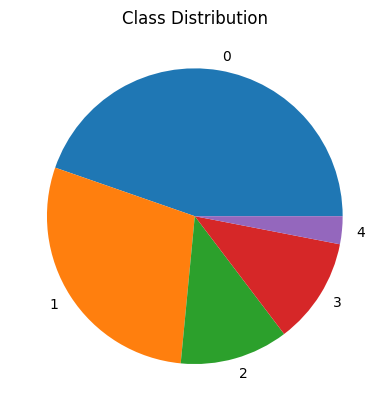

In [ ]:
plt.figure()
df['class'].value_counts().plot(kind="pie", ylabel="")
plt.title('Class Distribution')

## 3) Data Quality and Cleanup

###3.1) Data Quality

We will use the duplicated() and isnull() functions to determine the number of duplicate rows and amount of data missing from each feature.
-	There are two duplicate rows.
-	Several features have missing values.


In [ ]:
df.duplicated().value_counts()

,count
False,918
True,2


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Verify removal
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 918


<Axes: xlabel='resting_blood_pressure', ylabel='max_heart_rate'>

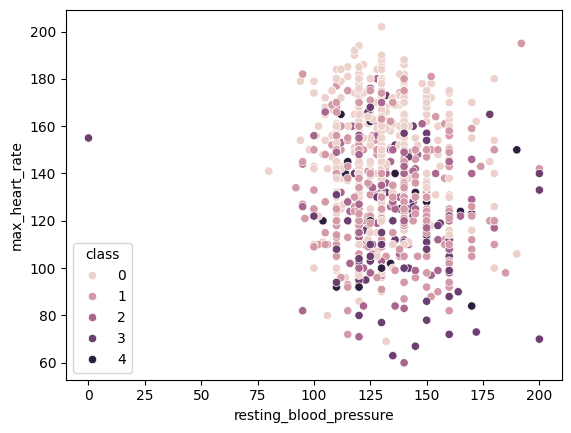

In [ ]:
sns.scatterplot(data=df, x="resting_blood_pressure", y="max_heart_rate", hue='class')

####3.1.1) Missing Values

Features 'num_major_vessels' and 'thal' have over 50% of their data missing. Due to extensive missing values, imputing is impractical. Removing these columns from our analysis is the best course of action.

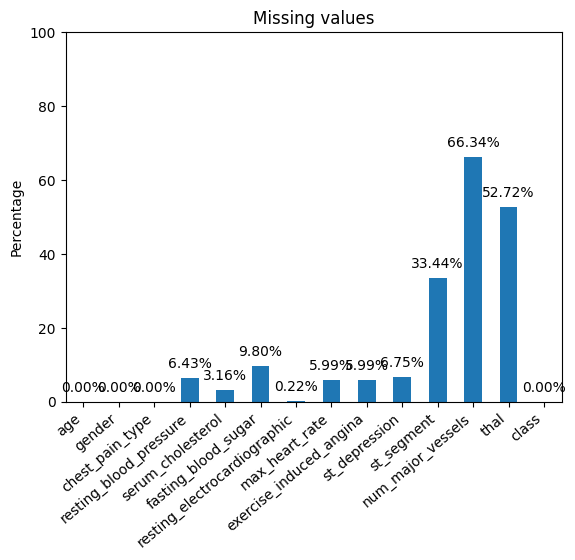

In [ ]:
missing_values_graph = (df.isna().mean().round(4) * 100).plot(kind='bar', ylim=[0, 100], title='Missing values', ylabel='Percentage')

# Rotate the labels for the x-axis
locs, labels = plt.xticks(rotation=40, ha='right')

# Add text labels with the percentage values
for p in missing_values_graph.patches:
    missing_values_graph.annotate(f'{p.get_height():.2f}%',
       (p.get_x() + p.get_width() / 2.,
        p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points')
plt.show()

In [ ]:
def drop_excessive_missing_columns(df, columns):
    for column in columns:
        if column in df.columns:
            df = df.drop(columns=[column])
            print(f"Dropped '{column}' due to excessive missing values.")
        else: print(f"'{column}' not found in the DataFrame, no action taken.")
    return df

# Define the columns to check for excessive missing values
columns_to_drop = ['num_major_vessels', 'thal']

# Call the function
df = drop_excessive_missing_columns(df, columns_to_drop)

Dropped 'num_major_vessels' due to excessive missing values.
Dropped 'thal' due to excessive missing values.


Any rows with 6 (50%) or more values missing will need to be dropped.

Text(0.5, 0, 'Number of rows')

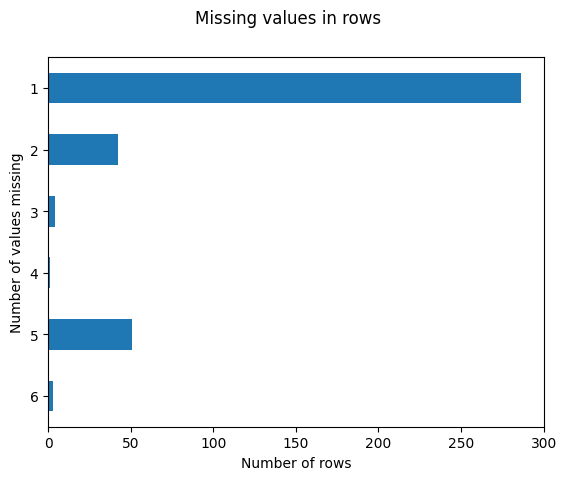

In [ ]:
plt.figure()
plt.suptitle('Missing values in rows')
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False).loc[lambda x: x.index > 0].plot(kind="barh")
plt.ylabel('Number of values missing')
plt.xlabel('Number of rows')

In [ ]:
df = df[df.isnull().sum(axis=1) != 6]
print(f"Rows with exactly 6 missing values have been dropped. Remaining rows: {df.shape[0]}")

Rows with exactly 6 missing values have been dropped. Remaining rows: 915


**Imputing missing values**

We will impute the 'st_segment' feature using the mode, as it is categorical.
The remaining features' missing values will be imputed using the mean or median, as they are numerical.

In [ ]:
# Imputing numerical features with mean or median
numerical_features = ['resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression', 'fasting_blood_sugar', 'resting_electrocardiographic', 'exercise_induced_angina']
for feature in numerical_features:
    if feature in df.columns:  # Checking if the feature exists
        df[feature] = df[feature].fillna(df[feature].median())
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

# Imputing categorical features with mode
categorical_features = ['st_segment']
for feature in categorical_features:
    if feature in df.columns:  # Checking if the feature exists
        df[feature] = df[feature].fillna(df[feature].mode()[0])
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

<ipython-input-12-0578e36b2389>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].median())
<ipython-input-12-0578e36b2389>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].mode()[0])


####3.1.2) Outliers

-  Resting blood pressure: There is an outlier with a value of 0 that needs to be removed. Additionally, a series of outliers outside the interquartile range will be clipped.
- Serum Cholesterol: There are outliers with a value of 0 that need to be removed. A series of outliers outside the interquartile range will also be clipped.
-  Max Heart Rate: Although there are no major outliers in this boxplot, for accuracy, values outside the interquartile range will be clipped.
-  ST Depression: A variety of outliers will be clipped to the interquartile range.


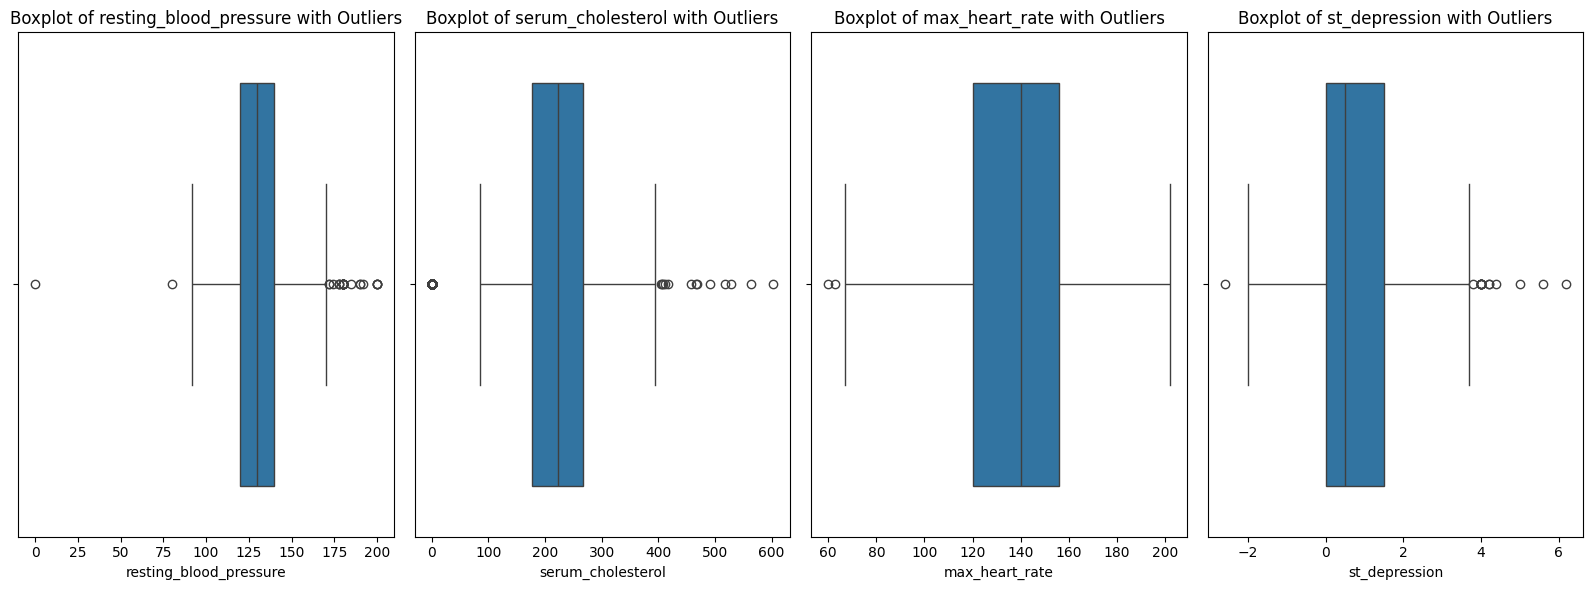

In [ ]:
# List of numerical columns to create boxplots for
numerical_cols = ['resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression']

n_cols = len(numerical_cols)

# A figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(16, 6))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} with Outliers')

plt.tight_layout()
plt.show()

####3.1.3) Noise

To handle noise in the dataset, we will use Z Scores. The following code sets the noise point value to the mean for the feature column.

In [ ]:
# Add a column named 'noise' and set the value to False for all instances
df["Noise"] = False
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           915 non-null    int64  
 1   gender                        915 non-null    int64  
 2   chest_pain_type               915 non-null    int64  
 3   resting_blood_pressure        915 non-null    float64
 4   serum_cholesterol             915 non-null    float64
 5   fasting_blood_sugar           915 non-null    float64
 6   resting_electrocardiographic  915 non-null    float64
 7   max_heart_rate                915 non-null    float64
 8   exercise_induced_angina       915 non-null    float64
 9   st_depression                 915 non-null    float64
 10  st_segment                    915 non-null    float64
 11  class                         915 non-null    int64  
 12  Noise                         915 non-null    bool   
dtypes: bool(1)

In [ ]:
std_threshold = 3

# for each feature (column)
for column_name in df.loc[:, 'age':'st_segment']:

    print("Checking " + column_name)

    # get the mean and standard deviation for the feature
    mean = df[column_name].mean()
    std  = df[column_name].std()

    # iterate through the DataFrame's index
    for index in df.index:

        value = df.at[index, column_name]
        z = (value-mean)/std

        if z > std_threshold:
            df.at[index, column_name] = mean
            print(" - Found a noise point at index", index)

df.iloc[10:20].head(10)

Checking age
Checking gender
Checking chest_pain_type
Checking resting_blood_pressure
 - Found a noise point at index 176
 - Found a noise point at index 326
 - Found a noise point at index 388
 - Found a noise point at index 538
 - Found a noise point at index 748
 - Found a noise point at index 880
 - Found a noise point at index 901
Checking serum_cholesterol
 - Found a noise point at index 352
 - Found a noise point at index 728
 - Found a noise point at index 746
Checking fasting_blood_sugar
Checking resting_electrocardiographic
Checking max_heart_rate
Checking exercise_induced_angina
Checking st_depression
 - Found a noise point at index 291
 - Found a noise point at index 323
 - Found a noise point at index 383
 - Found a noise point at index 391
 - Found a noise point at index 485
 - Found a noise point at index 789
Checking st_segment


,age,gender,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,st_depression,st_segment,class,Noise
10,56,1,2,126.0,166.0,0.0,1.0,140.0,0.0,0.0,2.0,0,False
11,59,1,4,140.0,0.0,0.0,1.0,117.0,1.0,1.0,2.0,1,False
12,62,1,4,110.0,0.0,0.0,0.0,120.0,1.0,0.5,2.0,1,False
13,63,1,3,130.0,0.0,0.0,2.0,140.0,0.0,0.5,2.0,1,False
14,57,1,4,128.0,0.0,1.0,1.0,148.0,1.0,1.0,2.0,1,False
15,62,1,4,120.0,220.0,0.0,1.0,86.0,0.0,0.0,2.0,0,False
16,63,1,4,170.0,177.0,0.0,0.0,84.0,1.0,2.5,3.0,4,False
17,46,1,4,110.0,236.0,0.0,0.0,125.0,1.0,2.0,2.0,1,False
18,63,1,4,126.0,0.0,0.0,1.0,120.0,0.0,1.5,3.0,0,False
19,60,1,4,152.0,0.0,0.0,1.0,118.0,1.0,0.0,2.0,0,False


## 4) Data Visualisation

I will start by creating a correlation heatmap to visualize which factors have the strongest correlations before further analysis.



Correlation Matrix:


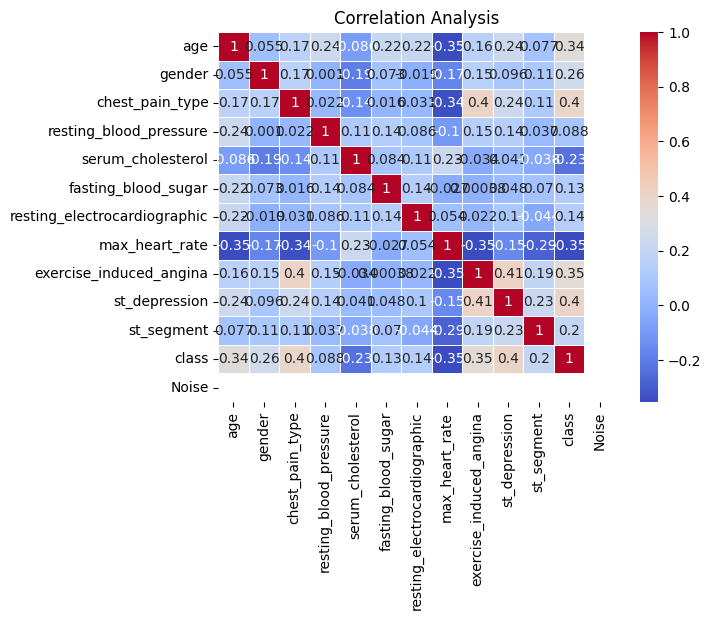

In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
#print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis')
plt.show()

From the heatmap, I can identify columns with higher correlations, specifically between: class and age, class and chest_pain_type, class and exercise_induced_angina, and class and st_depression. I will use other data visualization techniques to further explore these correlations.


For class and age, I have used a violin plot as this allows us to assess the age related to each pain variable in class as well as the frequency in correlation to this.
- The distribution of ages from class 1 to 4 shows that older patients have more severe heart disease.
- Class 4 has a narrower age range compared to classes 0-3, indicating a higher density of severe heart disease among older ages.


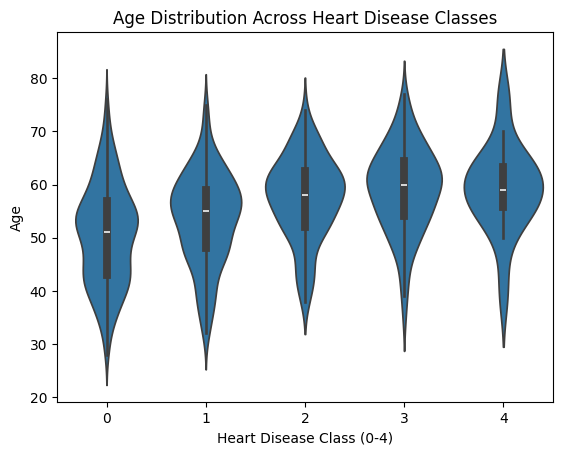

In [ ]:
sns.violinplot(x='class', y='age', data=df)
plt.xlabel('Heart Disease Class (0-4)')
plt.ylabel('Age')
plt.title('Age Distribution Across Heart Disease Classes')
plt.show()

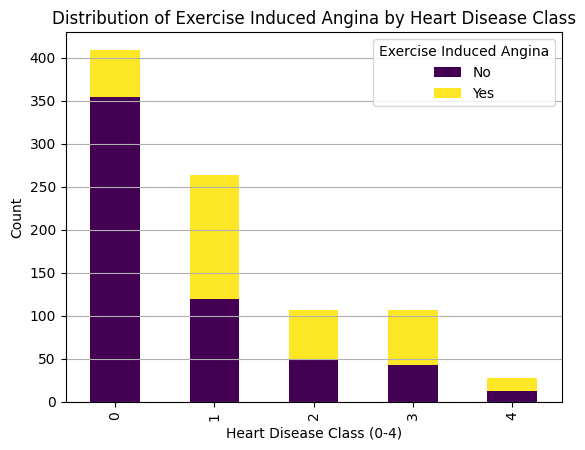

In [ ]:
pivot_table = df.pivot_table(index='class', columns='exercise_induced_angina', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Heart Disease Class (0-4)')
plt.ylabel('Count')
plt.title('Distribution of Exercise Induced Angina by Heart Disease Class')
plt.legend(title='Exercise Induced Angina', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()

This stacked bar chart visually represents the count of exercise induced angina by class.
From this we can infer:
-	The severity of heart disease is directly linked to a higher likelihood of exercise-induced angina.
-	Participants without heart disease rarely experience exercise-induced angina, emphasising the importance of early prevention and lifestyle changes.
-	The balanced distribution between classes 2 and 3 suggests exercise-induced angina becomes a significant symptom as the disease worsens.


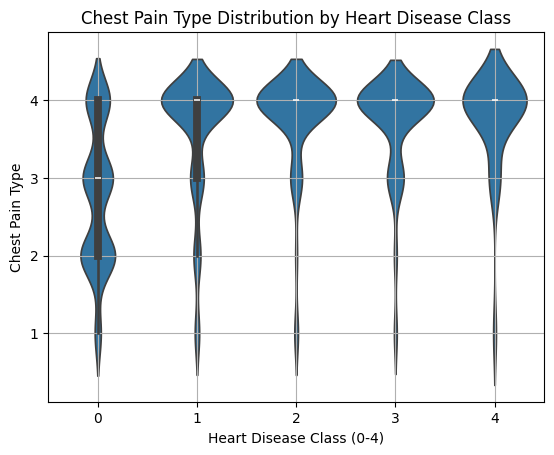

In [ ]:
sns.violinplot(x='class', y='chest_pain_type', data=df)
plt.xlabel('Heart Disease Class (0-4)')
plt.ylabel('Chest Pain Type')
plt.title('Chest Pain Type Distribution by Heart Disease Class')
plt.grid(True)
plt.show()

This violin plot compares chest pain type with heart disease class, showing that all participants experience chest pain. However, those diagnosed with heart disease experience less typical and atypical angina.
-	Class 0: Chest pain is more balanced, with no chest pain type predominating.
-	Increasing severity: As heart disease severity rises, chest pain type variability decreases, indicating that severe heart disease is associated with more specific chest pains like non-anginal pain and asymptomatic.
-	Class 4: The high density at one end suggests that asymptomatic pain is strongly associated with the most severe class of heart disease.

Understanding these patterns can help diagnose heart disease severity and tailor treatment plans based on chest pain type.


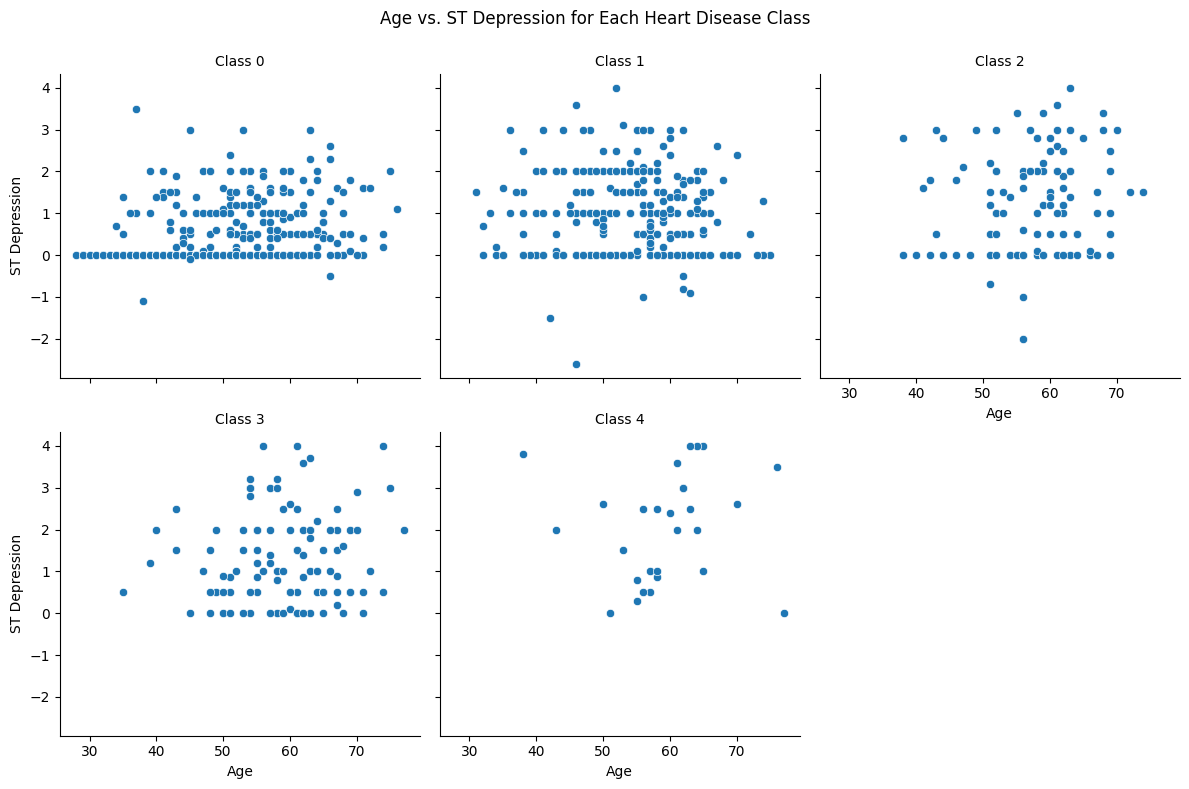

In [ ]:
g = sns.FacetGrid(df, col='class', col_wrap=3, height=4, aspect=1)
g.map(sns.scatterplot, 'age', 'st_depression')
g.set_axis_labels('Age', 'ST Depression')
g.set_titles('Class {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age vs. ST Depression for Each Heart Disease Class')
plt.show()

The scatterplots compare age to ST Depression by class.
The scatterplots confirm that as the severity increase so does:
-	Age
-	ST Depression Levels
-	The correlation between these factors


## 5) Evaluation of Applied Machine Learning


#### 5.1) Data pre-processing

Data quality has been addressed in the 'Data Quality and Cleanup' section.

In this section, I will process categorical variables using one-hot encoding to ensure that machine learning models do not assume an ordinal relationship that does not exist. We will start by splitting the dataset into features labelled X (input variables) and Y (output variable to predict).



In [ ]:
# Splitting the Pandas Dataframe into feature matrix X and class/label vector Y
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

#Identifying grouping categorical columns for one-hot encoding
categorical_cols = ['chest_pain_type', 'resting_electrocardiographic', 'st_segment', 'exercise_induced_angina', 'fasting_blood_sugar', 'gender']
#Application of one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols)

To fit the Logistic Regression model, it was necessary to impute NaNs using K-NN.

In [ ]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=10)

# Fit the imputer and transform the dataset
X = imputer.fit_transform(X)

#### 5.2) Machine Learning Models

Logistic Regression
-	Simple and effective for binary and multiclass classification tasks.
-	Easy to implement, interpret, and performs well on linearly separable datasets.
-	Great for initial baseline models and when interpretability is important.
-	Effective for medical professionals diagnosing patients.

Random Forest
-	Ensemble method combining multiple decision trees for improved performance.
-	Robust to overfitting, handles numerical and categorical data well, and provides feature importance.
-	Ideal for complex datasets with feature interactions and when accuracy is critical.
-	Perfect for a medical setting where accuracy is crucial.

These models will be implemented using the scikit-learn library.


##### 5.2.1) Logistic Regression


In [ ]:
# Define the parameter grid
param_grid = { 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'] }

# Instantiate the model
model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters and best score
lr_best_params = grid_search.best_params_
lr_best_score = grid_search.best_score_

print(f"Best Parameters: {lr_best_params}")
print(f"Best Cross-Validation Accuracy: {lr_best_score:.2f}")

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.57


**Class Imbalance**

Upon examination, a major class imbalance was discovered. I've merged classes 1-4 into one class representing the presence of heart disease. This resolves the class imbalance issue and should improve the model's accuracy.

This change will be effective in a medical setting to identify the presence or absence of heart disease. Although the severity won't be predicted, medical experts can conduct specific tests for each patient individually.

In [ ]:
# Grouping the present classes
y = np.array(y)
y = np.where(y == 0, 0, 1)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate the model
lr_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=25)
cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Cross-Validation Accuracy: 0.80 (+/- 0.04)


**Analysis of Linear Regression**

Initially, I used hold-out validation with an 80/20 split and a random_state set to 25 for reproducibility, but it was less accurate than other methods. To improve model validation, I switched to cross-validation, which provides a stable and reliable estimate by averaging multiple splits. The initial model accuracy was poor (0.47), so we will improve it using scaling and hyperparameter tuning.

For hyperparameter tuning, we will use GridSearchCV to find the optimal hyperparameters and enhance model accuracy. Experimenting with KFold, a 3-split improved accuracy to 0.81 (+/- 0.03). However, a 5-split KFold provided a more robust and stable estimate, resulting in a model accuracy of 0.80 (+/- 0.03), which still represents a successful prediction.


##### 5.2.2) Random Forest

In [ ]:
# Define the parameter grid
param_grid = { 'n_estimators': [50, 100, 200], # Number of trees in the forest
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': [10, 20, 30, None], # Maximum depth of the tree
               'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]} # Method of selecting samples for training each tree }
# Instantiate the model
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and best score
rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_

print(f"Best Parameters: {rf_best_params}")
print(f"Best Cross-Validation Accuracy: {rf_best_score:.2f}")

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
# Instantiating model
model = RandomForestClassifier(bootstrap= True, max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)
rf_cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='accuracy')

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (rf_cv_scores.mean(), rf_cv_scores.std() * 2))

Accuracy:  0.80 (+/- 0.04)


**Analysis of Random Forest**

Learning from the Linear Regression model, I used cross-validation to enhance the validation of the Random Forest model, taking advantage of its stable and reliable estimate. Initially, the accuracy was poor (0.52). To improve this, I applied hyperparameter tuning using GridSearchCV to find the optimal parameters, which was necessary for fine-tuning the model’s accuracy.

I implemented a 5 StratifiedKFold split, ensuring each fold had a representative proportion of each class to maintain the target variable's distribution. This resulted in a model accuracy of 0.80 (+/- 0.03), representing a respectable prediction accuracy.


#### 5.3) Critical Evaluation of Results

Random Forest (RF) and Linear Regression

-	Both achieved 80% accuracy, with RF having the lowest standard deviation.
-	Despite the small dataset, both models predict heart disease presence or absence successfully but may be wrong 2/10 times.
-	Data Processing
 -	Significantly impacts model accuracy.
 - Balancing classes and high-quality data are crucial.
 -	Grouping classes improved accuracy, though the model now detects presence or absence of heart disease rather than severity.
-	Feature Scaling
 -	Essential for Logistic Regression to ensure proportional variable contribution, improving convergence and accuracy to 0.80.
 -	Random Forest benefited less from scaling but consistent preprocessing allowed fair performance comparison.
-	Hyperparameter Tuning
 -	GridSearchCV enhanced both models' performance.
 -	Preprocessing decisions must align with real-world demands to mitigate risks in medical settings.

**Ethical Concerns**

-	Simplifying severity into a binary presence/absence label may obscure critical details for patient-specific treatment.
-	Transparency about the model's limitations is crucial.
-	A larger, fairer dataset for all 5 classes would benefit a model evaluating both heart disease severity and presence.
-	Clinicians must use machine learning models as part of a diagnostic process, not standalone tools.
-	Patients should be informed that the model cannot detail condition severity and its accuracy results upon release.

**Data Privacy and Security**
-	Handling and transforming sensitive medical data during preprocessing must adhere to strict privacy regulations (e.g., GDPR, HIPAA).
-	Secure storage and anonymization are essential to maintain patient trust.
-	Identifiable information like names and addresses must be removed or masked.
-	Encryption ensures data cannot be traced back to individual patients even in the event of a breach.

**Bias Risks**
-	Preprocessing steps like class merging may unintentionally introduce biases, affecting prediction accuracy for certain patient groups.
-	Younger patients with less severe or atypical heart disease could be overlooked when severity levels are merged into a single presence class.
-	Certain populations may have unique risk factors or presentations of heart disease (e.g., higher hypertension rates in Black populations).
-	Oversimplified preprocessing may not account for these nuances.
-	Patients with additional medical conditions may also exhibit distinct heart disease patterns.

**Conclusion**
-	Both Logistic Regression and Random Forest demonstrated similar accuracy, with Random Forest slightly more stable.
-	Both models predict heart disease presence or absence effectively, but their limitations (20% error rate, inability to classify severity) must not be overlooked.
-	Machine learning models should complement human expertise in medical workflows rather than replace it.
